# INTRODUCTION TO REGRESSION WITH NEURAL NETWORKS IN TENSORFLOW

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2023-07-18 00:13:25.467038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


## Creating data to view and fit

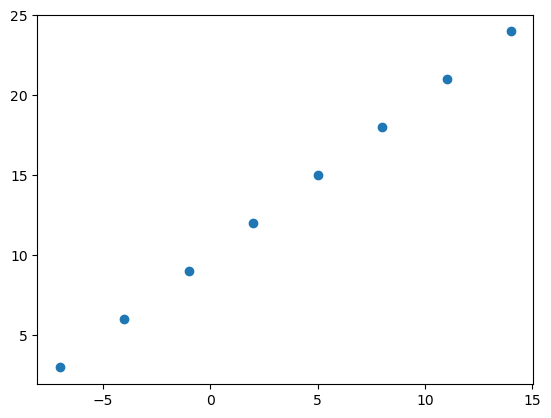

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-07-18 00:13:41.184757: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
x[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
x[0].ndim

0

In [8]:
x[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn our NumPy Arayys into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

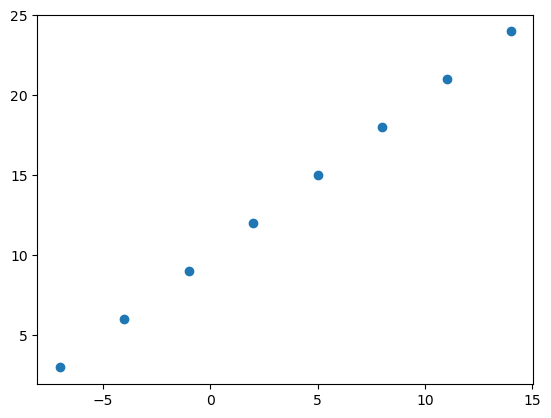

In [11]:
plt.scatter(x, y)

# Steps in modelling with TensorFlow

1. Creating a model
2. Compiling a model
3. Fitting a model

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5


1/1 [==============================] - 1s 944ms/step - loss: 11.4920 - mae: 11.4920
Epoch 2/5
1/1 [==============================] - 0s 29ms/step - loss: 11.3595 - mae: 11.3595
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2270 - mae: 11.2270
Epoch 4/5
1/1 [==============================] - 0s 25ms/step - loss: 11.0945 - mae: 11.0945
Epoch 5/5
1/1 [==============================] - 0s 35ms/step - loss: 10.9620 - mae: 10.9620


In [13]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 173ms/step


array([[12.778134]], dtype=float32)

In [15]:
y_pred + 11

array([[23.778133]], dtype=float32)

## Imporving our Model

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [16]:
# let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# 3. Fit the model (this time we train for longer)
model.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 476ms/step - loss: 16.9705 - mae: 16.9705
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 16.6893 - mae: 16.6893
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 16.4080 - mae: 16.4080
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 16.1268 - mae: 16.1268
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 15.8455 - mae: 15.8455
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 15.5643 - mae: 15.5643
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 15.2830 - mae: 15.2830
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 15.0018 - mae: 15.0018
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 14.7837 - mae: 14.7837
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 14.6512 - mae: 14.6512
Epoch 11/100
1/1 [==============================

In [17]:
# Remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 143ms/step


array([[29.475973]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

model.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 859ms/step - loss: 13.1425 - mae: 13.1425
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 12.4964 - mae: 12.4964
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8606 - mae: 11.8606
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 11.2530 - mae: 11.2530
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 10.6613 - mae: 10.6613
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 10.0744 - mae: 10.0744
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 9.6258 - mae: 9.6258
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1757 - mae: 9.1757
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7260 - mae: 8.7260
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 8.2653 - mae: 8.2653
Epoch 11/100
1/1 [==============================] - 0s 2

In [20]:
# let's remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 141ms/step


array([[27.67941]], dtype=float32)

# Evaluating a Modal

In [22]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

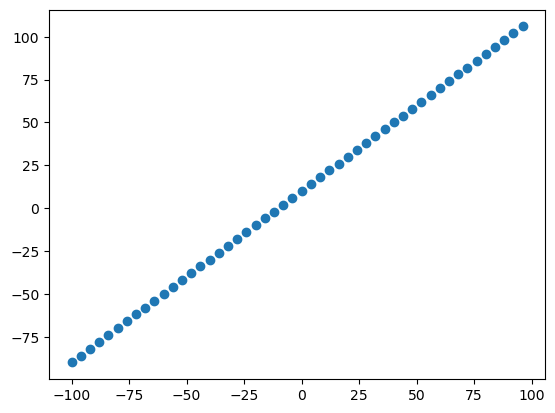

In [24]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(x)

50

In [26]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
x_test = x[40:] # last 10 are testing samples (20% of the data)

y_train = y[:40] # first 40 are training samples (80% of the data)
y_test = y[40:] # last 10 are testing samples (20% of the data)

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data ###

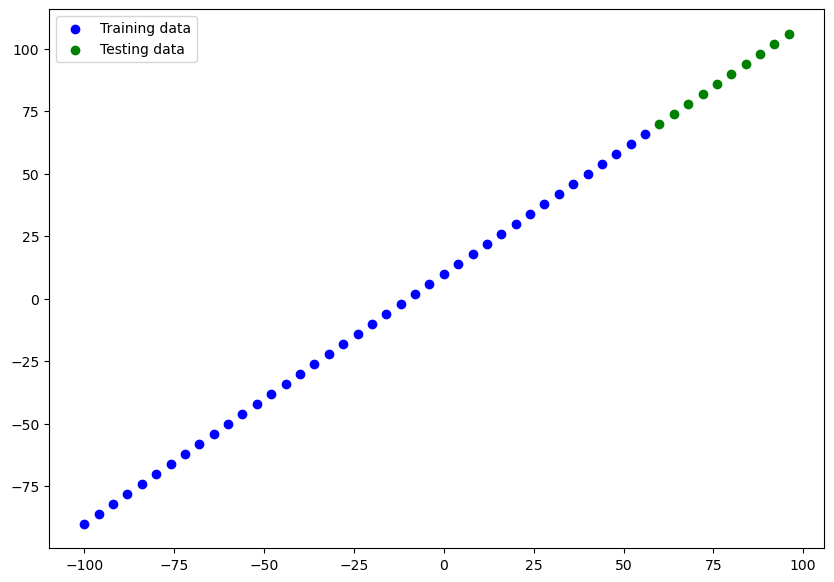

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend()

In [28]:
# Lets have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# # 3. Fit the model
# model.fit(x_train, y_train, epochs=100)

# Visualizing the data

In [29]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="modal_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])



In [30]:
model.summary()

Model: "modal_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [31]:
# fit the model
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 55ms/step - loss: 34.8639 - mae: 34.8639
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 28.2549 - mae: 28.2549
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 26.5624 - mae: 26.5624
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 14.8193 - mae: 14.8193
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 22.0641 - mae: 22.0641
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8884 - mae: 10.8884
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 11.8956 - mae: 11.8956
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 10.8631 - mae: 10.8631
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 37.2709 - mae: 37.2709
Epoch 10/100
2/2 [==============================] - 0s 33ms/step - loss: 24.9738 - mae: 24.9738
Epoch 11/100
2/2 [==============================]

In [32]:
# get a summary of our model
model.summary()

Model: "modal_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [33]:
# from tensorflow.keras.utils import plot_model

# plot_model(model=model, show_shapes=True)


### Visualizing our modals predictions

In [34]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 203ms/step


array([[ 69.58636 ],
       [ 74.11269 ],
       [ 78.63903 ],
       [ 83.16536 ],
       [ 87.6917  ],
       [ 92.21805 ],
       [ 96.74437 ],
       [101.27071 ],
       [105.79705 ],
       [110.323395]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
# lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """_summary_
    Plots training data, test data and compares predictions to ground truth

    Args:
        train_data (_type_, optional): _description_. Defaults to x_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to x_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
        predictions (_type_, optional): _description_. Defaults to y_pred.
    """
    
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # show the legend
    plt.legend()

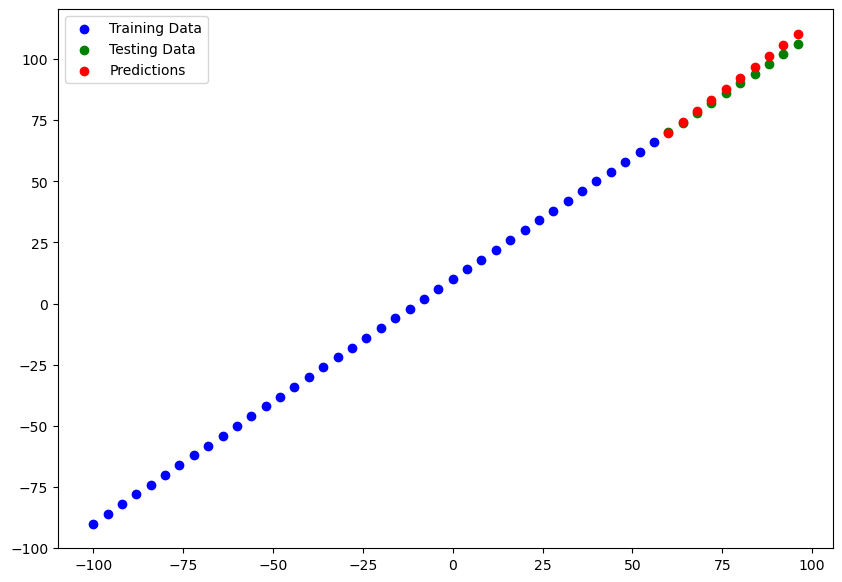

In [37]:
plot_predictions(train_data=x_train, 
                 train_labels=y_train, 
                 test_data=x_test, 
                 test_labels=y_test, 
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

In [38]:
# Evaluate the modal on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 294ms/step - loss: 2.0376 - mae: 2.0376


[2.0376007556915283, 2.0376007556915283]

In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.413643, 14.732384, 12.144388, 10.566928, 10.      , 10.443609,
       11.897748, 14.362429, 17.83764 , 22.323395], dtype=float32)>

In [40]:
y_pred

array([[ 69.58636 ],
       [ 74.11269 ],
       [ 78.63903 ],
       [ 83.16536 ],
       [ 87.6917  ],
       [ 92.21805 ],
       [ 96.74437 ],
       [101.27071 ],
       [105.79705 ],
       [110.323395]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.58636 ,  74.11269 ,  78.63903 ,  83.16536 ,  87.6917  ,
        92.21805 ,  96.74437 , 101.27071 , 105.79705 , 110.323395],
      dtype=float32)>

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.0376008>

In [44]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.107029>

In [45]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))



## Running experiments to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [46]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=100)

Epoch 1/100


2/2 [==============================] - 1s 41ms/step - loss: 75.1734 - mae: 75.1734
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 39.8388 - mae: 39.8388
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 8.9019 - mae: 8.9019
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 9.5112 - mae: 9.5112
Epoch 5/100
2/2 [==============================] - 0s 47ms/step - loss: 10.4080 - mae: 10.4080
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 9.6450 - mae: 9.6450
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 8.7528 - mae: 8.7528
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0799 - mae: 9.0799
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 19.1684 - mae: 19.1684
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 10.3612 - mae: 10.3612
Epoch 11/100
2/2 [==============================] - 0s 14ms/step - loss

1/1 [==============================] - 0s 104ms/step


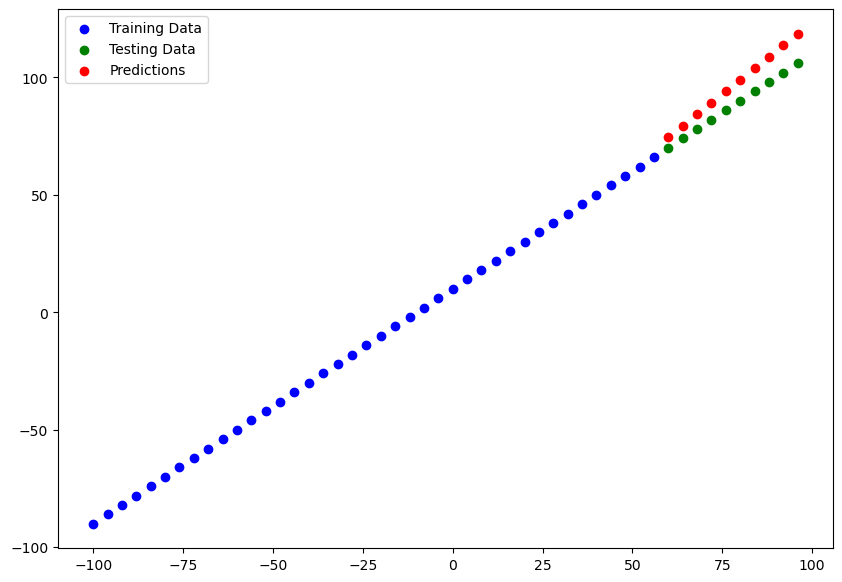

In [47]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.560657>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.76849>)

**Build `model_2`**

In [49]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=100)
    

Epoch 1/100


2/2 [==============================] - 1s 42ms/step - loss: 33.6632 - mse: 1574.1227
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 28.0783 - mse: 1026.0930
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 33.1316 - mse: 1648.2703
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 27.8142 - mse: 1137.4348
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.1475 - mse: 290.7497
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 12.0378 - mse: 176.0268
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 11.3491 - mse: 156.0074
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 11.1604 - mse: 168.0251
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 41.2227 - mse: 2696.7742
Epoch 10/100
2/2 [==============================] - 0s 27ms/step - loss: 28.5191 - mse: 1148.0140
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 262ms/step


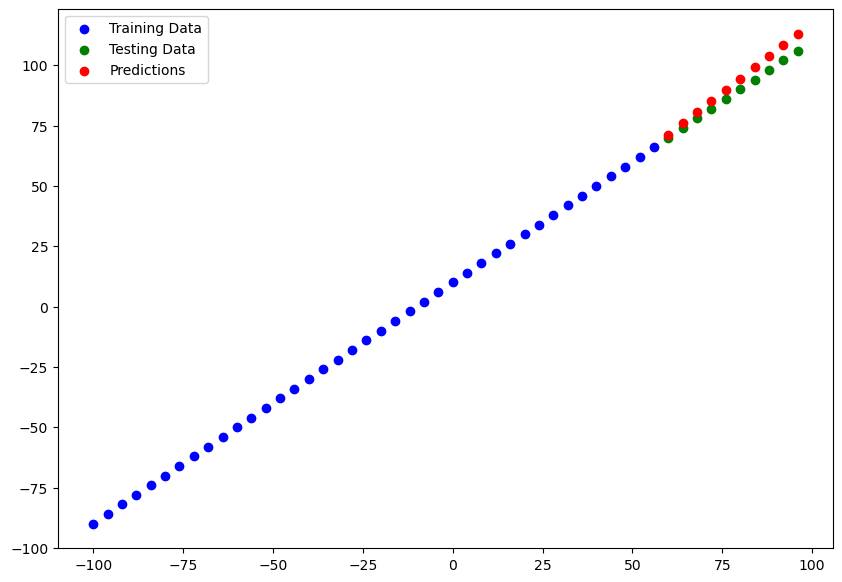

In [50]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions=y_pred_2)

In [51]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=4.161245>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20.71049>)

**Build `model_3`**

In [52]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=500, verbose=0)


1/1 [==============================] - 0s 139ms/step


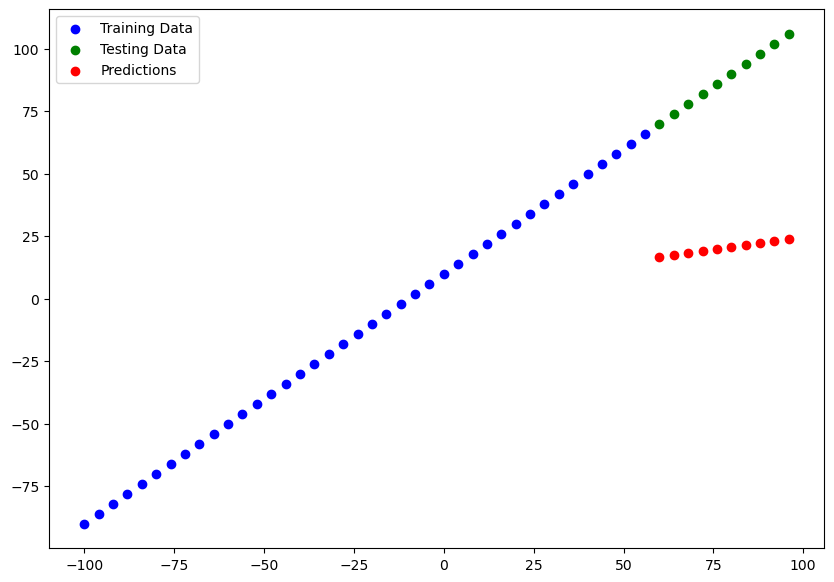

In [53]:
# Make and Plot some predictions
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions=y_pred_3)

In [54]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.785324>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4679.1475>)

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [55]:
# Lets's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

ModuleNotFoundError: No module named 'pandas'

Looks like model_2 performed the best

In [56]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments